# Netflix (NFLX) Financial Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Wrangling](#data-wrangling)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

This project will be a vertical analysis of the Netflix's year over year financial data under ticker symbol NFLX. First, I will web scrape the public financial data from using the yfinance API. Then I will preprocess and clean the scraped public data and turn it into a structured data source to be ready for analysis. Lastly, I will analyze the financial stock data to calculate the financial KPIs for potential shareholders. 

##### Disclaimer: This is NOT financial advice in any form, and is strictly for educational purposes ONLY. 

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries & Financial Data

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Scraping the financial data using yfinance by inputting ticker symbol
netflix_df = yf.Ticker('NFLX')

# Creating loop to display the data in a readable form
for key, value in netflix_df.info.items():
    print(f'{key}: {value}')

address1: 121 Albright Way
city: Los Gatos
state: CA
zip: 95032
country: United States
phone: (408) 540-3700
website: https://www.netflix.com
industry: Entertainment
industryKey: entertainment
industryDisp: Entertainment
sector: Communication Services
sectorKey: communication-services
sectorDisp: Communication Services
longBusinessSummary: Netflix, Inc. provides entertainment services. The company offers television (TV) series, documentaries, feature films, and games across various genres and languages. It also provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, TV set-top boxes, and mobile devices. The company operates approximately in 190 countries. Netflix, Inc. was incorporated in 1997 and is headquartered in Los Gatos, California.
fullTimeEmployees: 14000
companyOfficers: [{'maxAge': 1, 'name': 'Mr. Wilmot Reed Hastings Jr.', 'age': 64, 'title': 'Co-Founder & Chairman', 'yearBorn': 1960, 'fis

In [3]:
# Retrieving and viewing the income statement from the larger dataset for this project
income_statement = netflix_df.income_stmt
income_statement.info()
income_statement.head()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Tax Effect Of Unusual Items to Operating Revenue
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2024-12-31 00:00:00  40 non-null     object
 1   2023-12-31 00:00:00  38 non-null     object
 2   2022-12-31 00:00:00  40 non-null     object
 3   2021-12-31 00:00:00  40 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.13,0.13,0.15,0.12
Normalized EBITDA,26314821000.0,21508387000.0,20332955000.0,19044502000.0
Net Income From Continuing Operation Net Minority Interest,8711631000.0,5407990000.0,4491924000.0,5116228000.0
Reconciled Depreciation,15630431000.0,14554384000.0,14362814000.0,12438779000.0


In [4]:
# For the preprocessing portion of the project, I will invert the index and column values to make it
#  easier and visually more intuitive to find the issues in the data. After I am done cleaning, 
# I will revert the data to its original form.
income_statement = income_statement.T
income_statement.info()
income_statement.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2024-12-31 to 2021-12-31
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Tax Effect Of Unusual Items                                 4 non-null      object
 1   Tax Rate For Calcs                                          4 non-null      object
 2   Normalized EBITDA                                           4 non-null      object
 3   Net Income From Continuing Operation Net Minority Interest  4 non-null      object
 4   Reconciled Depreciation                                     4 non-null      object
 5   Reconciled Cost Of Revenue                                  4 non-null      object
 6   EBITDA                                                      4 non-null      object
 7   EBIT                                                        4 non-null      objec

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,...,7544888000.0,2925295000.0,4619593000.0,2917554000.0,1702039000.0,1702039000.0,17962502000.0,21038464000.0,39000966000.0,39000966000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,...,7053926000.0,2675758000.0,4378168000.0,2657883000.0,1720285000.0,1720285000.0,14007929000.0,19715368000.0,33723297000.0,33723297000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,...,6814434000.0,2711041000.0,4103393000.0,2530502000.0,1572891000.0,1572891000.0,12447265000.0,19168285000.0,31615550000.0,31615550000.0
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,...,6170652000.0,2273885000.0,3896767000.0,2545146000.0,1351621000.0,1351621000.0,12365161000.0,17332683000.0,29697844000.0,29697844000.0


[Back to Table of Contents](#back)

## Pre-Processing Data

In [5]:
# Getting a visual sample of the data, data info, and using pandas to set the columns display to max
pd.set_option('display.max_columns', None)
income_statement.info()
income_statement.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2024-12-31 to 2021-12-31
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Tax Effect Of Unusual Items                                 4 non-null      object
 1   Tax Rate For Calcs                                          4 non-null      object
 2   Normalized EBITDA                                           4 non-null      object
 3   Net Income From Continuing Operation Net Minority Interest  4 non-null      object
 4   Reconciled Depreciation                                     4 non-null      object
 5   Reconciled Cost Of Revenue                                  4 non-null      object
 6   EBITDA                                                      4 non-null      object
 7   EBIT                                                        4 non-null      objec

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Total Operating Income As Reported,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,266776000.0,8711631000.0,8711631000.0,28583352000.0,10417614000.0,439261000.0,429519000.0,19.83,20.28,8711631000.0,8711631000.0,8711631000.0,8711631000.0,8711631000.0,1254026000.0,9965657000.0,-451957000.0,718733000.0,266776000.0,10417614000.0,7544888000.0,2925295000.0,4619593000.0,2917554000.0,1702039000.0,1702039000.0,17962502000.0,21038464000.0,39000966000.0,39000966000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,NaN,5407990000.0,5407990000.0,26769294000.0,6954003000.0,449498000.0,441571000.0,12.03,12.25,5407990000.0,5407990000.0,5407990000.0,5407990000.0,5407990000.0,797415000.0,6205405000.0,-748598000.0,748598000.0,NaN,6954003000.0,7053926000.0,2675758000.0,4378168000.0,2657883000.0,1720285000.0,1720285000.0,14007929000.0,19715368000.0,33723297000.0,33723297000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,337310000.0,4491924000.0,4491924000.0,25982719000.0,5632831000.0,451290000.0,444698000.0,9.95,10.1,4491924000.0,4491924000.0,4491924000.0,4491924000.0,4491924000.0,772005000.0,5263929000.0,-368902000.0,706212000.0,337310000.0,5632831000.0,6814434000.0,2711041000.0,4103393000.0,2530502000.0,1572891000.0,1572891000.0,12447265000.0,19168285000.0,31615550000.0,31615550000.0
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,411214000.0,5116228000.0,5116228000.0,23503335000.0,6194509000.0,455372000.0,443155000.0,11.24,11.55,5116228000.0,5116228000.0,5116228000.0,5116228000.0,5116228000.0,723875000.0,5840103000.0,-354406000.0,765620000.0,411214000.0,6194509000.0,6170652000.0,2273885000.0,3896767000.0,2545146000.0,1351621000.0,1351621000.0,12365161000.0,17332683000.0,29697844000.0,29697844000.0


### Duplicates

In [6]:
# Checking for duplicates
income_statement.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [7]:
# Checking for null values
income_statement.isna().sum()

Tax Effect Of Unusual Items                                   0
Tax Rate For Calcs                                            0
Normalized EBITDA                                             0
Net Income From Continuing Operation Net Minority Interest    0
Reconciled Depreciation                                       0
Reconciled Cost Of Revenue                                    0
EBITDA                                                        0
EBIT                                                          0
Net Interest Income                                           0
Interest Expense                                              0
Interest Income                                               1
Normalized Income                                             0
Net Income From Continuing And Discontinued Operation         0
Total Expenses                                                0
Total Operating Income As Reported                            0
Diluted Average Shares                  

In [8]:
# Looking at the null values
print(income_statement['Interest Income'])
print(income_statement['Interest Income Non Operating'])

2024-12-31    266776000.0
2023-12-31            NaN
2022-12-31    337310000.0
2021-12-31    411214000.0
Name: Interest Income, dtype: object
2024-12-31    266776000.0
2023-12-31            NaN
2022-12-31    337310000.0
2021-12-31    411214000.0
Name: Interest Income Non Operating, dtype: object


In [9]:
# Filling in null values from specified columns
columns_to_replace = ['Interest Income', 'Interest Income Non Operating']

# Creating a loop to fill in null values with ‘0’ from the specified columns
for column in columns_to_replace: 
    income_statement[column] = income_statement[column].fillna('0')

# Checking for null values
income_statement.isna().sum()

Tax Effect Of Unusual Items                                   0
Tax Rate For Calcs                                            0
Normalized EBITDA                                             0
Net Income From Continuing Operation Net Minority Interest    0
Reconciled Depreciation                                       0
Reconciled Cost Of Revenue                                    0
EBITDA                                                        0
EBIT                                                          0
Net Interest Income                                           0
Interest Expense                                              0
Interest Income                                               0
Normalized Income                                             0
Net Income From Continuing And Discontinued Operation         0
Total Expenses                                                0
Total Operating Income As Reported                            0
Diluted Average Shares                  

[Back to Table of Contents](#back)

### Data Wrangling

#### Cleaning Headers

In [10]:
# Getting general information about the dataset
income_statement.info()
income_statement.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2024-12-31 to 2021-12-31
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Tax Effect Of Unusual Items                                 4 non-null      object
 1   Tax Rate For Calcs                                          4 non-null      object
 2   Normalized EBITDA                                           4 non-null      object
 3   Net Income From Continuing Operation Net Minority Interest  4 non-null      object
 4   Reconciled Depreciation                                     4 non-null      object
 5   Reconciled Cost Of Revenue                                  4 non-null      object
 6   EBITDA                                                      4 non-null      object
 7   EBIT                                                        4 non-null      objec

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Total Operating Income As Reported,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,266776000.0,8711631000.0,8711631000.0,28583352000.0,10417614000.0,439261000.0,429519000.0,19.83,20.28,8711631000.0,8711631000.0,8711631000.0,8711631000.0,8711631000.0,1254026000.0,9965657000.0,-451957000.0,718733000.0,266776000.0,10417614000.0,7544888000.0,2925295000.0,4619593000.0,2917554000.0,1702039000.0,1702039000.0,17962502000.0,21038464000.0,39000966000.0,39000966000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,0,5407990000.0,5407990000.0,26769294000.0,6954003000.0,449498000.0,441571000.0,12.03,12.25,5407990000.0,5407990000.0,5407990000.0,5407990000.0,5407990000.0,797415000.0,6205405000.0,-748598000.0,748598000.0,0,6954003000.0,7053926000.0,2675758000.0,4378168000.0,2657883000.0,1720285000.0,1720285000.0,14007929000.0,19715368000.0,33723297000.0,33723297000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,337310000.0,4491924000.0,4491924000.0,25982719000.0,5632831000.0,451290000.0,444698000.0,9.95,10.1,4491924000.0,4491924000.0,4491924000.0,4491924000.0,4491924000.0,772005000.0,5263929000.0,-368902000.0,706212000.0,337310000.0,5632831000.0,6814434000.0,2711041000.0,4103393000.0,2530502000.0,1572891000.0,1572891000.0,12447265000.0,19168285000.0,31615550000.0,31615550000.0
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,411214000.0,5116228000.0,5116228000.0,23503335000.0,6194509000.0,455372000.0,443155000.0,11.24,11.55,5116228000.0,5116228000.0,5116228000.0,5116228000.0,5116228000.0,723875000.0,5840103000.0,-354406000.0,765620000.0,411214000.0,6194509000.0,6170652000.0,2273885000.0,3896767000.0,2545146000.0,1351621000.0,1351621000.0,12365161000.0,17332683000.0,29697844000.0,29697844000.0


[Back to Table of Contents](#back)

#### Cleaning Column Elements

In [11]:
# Creating a loop to change the data types to float for later mathematical arithmetic. 
# Normally, I would change most of these columns to integer values, but when we invert the 
# columns and index values later, the entire table is going to convert to float data type regardless.
for column in income_statement: 
    income_statement[column] = income_statement[column].astype(float)

# Inverting the column and index values to its original state
income_statement = income_statement.T

# To display values at integers rather than in scientific notation
pd.set_option('display.float_format', str)

# Getting general information about the dataset
income_statement.info()
income_statement

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Tax Effect Of Unusual Items to Operating Revenue
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-12-31 00:00:00  40 non-null     float64
 1   2023-12-31 00:00:00  40 non-null     float64
 2   2022-12-31 00:00:00  40 non-null     float64
 3   2021-12-31 00:00:00  40 non-null     float64
dtypes: float64(4)
memory usage: 2.6+ KB


,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.13,0.13,0.15,0.12
Normalized EBITDA,26314821000.0,21508387000.0,20332955000.0,19044502000.0
Net Income From Continuing Operation Net Minority Interest,8711631000.0,5407990000.0,4491924000.0,5116228000.0
Reconciled Depreciation,15630431000.0,14554384000.0,14362814000.0,12438779000.0
Reconciled Cost Of Revenue,21038464000.0,19715368000.0,19168285000.0,17332683000.0
EBITDA,26314821000.0,21508387000.0,20332955000.0,19044502000.0
EBIT,10684390000.0,6954003000.0,5970141000.0,6605723000.0
Net Interest Income,-451957000.0,-748598000.0,-368902000.0,-354406000.0
Interest Expense,718733000.0,748598000.0,706212000.0,765620000.0


In [12]:
# Splitting each year into its own individual dataframe so I can manipulate the data and create a new column based on each year's financial performance
is_24 = income_statement.iloc[:, 0:1]
is_23 = income_statement.iloc[:, 1:2]
is_22 = income_statement.iloc[:, 2:3]
is_21 = income_statement.iloc[:, 3:4]

# Creating a custom function for each year to get each line item to be listed as a percentage of the total revenue
def fix_24(value):
    if (value > 999):
        return (value / is_24['2024-12-31'].max())
    elif value < 0:
        return -(abs(value) / is_24['2024-12-31'].max())
    else:
        return value
    
def fix_23(value):
    if (value > 999):
        return (value / is_23['2023-12-31'].max())
    elif value < 0:
        return -(abs(value) / is_23['2023-12-31'].max())
    else:
        return value

def fix_22(value):
    if (value > 999):
        return (value / is_22['2022-12-31'].max())
    elif value < 0:
        return -(abs(value) / is_22['2022-12-31'].max())
    else:
        return value
    
def fix_21(value):
    if (value > 999):
        return (value / is_21['2021-12-31'].max())
    elif value < 0:
        return -(abs(value) / is_21['2021-12-31'].max())
    else:
        return value
    
# Applying the custom function to each dataframe
is_24['%_of_revenue_24'] = is_24['2024-12-31'].apply(fix_24).round(2)
is_23['%_of_revenue_23'] = is_23['2023-12-31'].apply(fix_23).round(2)
is_22['%_of_revenue_22'] = is_22['2022-12-31'].apply(fix_22).round(2)
is_21['%_of_revenue_21'] = is_21['2021-12-31'].apply(fix_21).round(2)

C:\Users\jason\AppData\Local\Temp\ipykernel_11420\3750092224.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_24['%_of_revenue_24'] = is_24['2024-12-31'].apply(fix_24).round(2)
C:\Users\jason\AppData\Local\Temp\ipykernel_11420\3750092224.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_23['%_of_revenue_23'] = is_23['2023-12-31'].apply(fix_23).round(2)
C:\Users\jason\AppData\Local\Temp\ipykernel_11420\3750092224.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [13]:
# Splitting the annual percentage of revenue columns and combining them into one dataframe to later graph to see how each line item has changed year over year
is_24_por = is_24.iloc[:, 1:2]
is_23_por = is_23.iloc[:, 1:2]
is_22_por = is_22.iloc[:, 1:2]
is_21_por = is_21.iloc[:, 1:2]

# Combining the separate dataframes into one
is_df = pd.concat([is_21, is_22, is_23, is_24], axis=1)

percentage_of_rev_is = pd.concat([is_21_por, is_22_por, is_23_por, is_24_por], axis=1)
percentage_of_rev_is

,%_of_revenue_21,%_of_revenue_22,%_of_revenue_23,%_of_revenue_24
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.12,0.15,0.13,0.13
Normalized EBITDA,0.64,0.64,0.64,0.67
Net Income From Continuing Operation Net Minority Interest,0.17,0.14,0.16,0.22
Reconciled Depreciation,0.42,0.45,0.43,0.4
Reconciled Cost Of Revenue,0.58,0.61,0.58,0.54
EBITDA,0.64,0.64,0.64,0.67
EBIT,0.22,0.19,0.21,0.27
Net Interest Income,-0.01,-0.01,-0.02,-0.01
Interest Expense,0.03,0.02,0.02,0.02


[Back to Table of Contents](#back)

## Vertical Analysis

In [43]:
display(income_statement)

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.13,0.13,0.15,0.12
Normalized EBITDA,26314821000.0,21508387000.0,20332955000.0,19044502000.0
Net Income From Continuing Operation Net Minority Interest,8711631000.0,5407990000.0,4491924000.0,5116228000.0
Reconciled Depreciation,15630431000.0,14554384000.0,14362814000.0,12438779000.0
Reconciled Cost Of Revenue,21038464000.0,19715368000.0,19168285000.0,17332683000.0
EBITDA,26314821000.0,21508387000.0,20332955000.0,19044502000.0
EBIT,10684390000.0,6954003000.0,5970141000.0,6605723000.0
Net Interest Income,-451957000.0,-748598000.0,-368902000.0,-354406000.0
Interest Expense,718733000.0,748598000.0,706212000.0,765620000.0


In [14]:
display(is_df)

,2021-12-31 00:00:00,%_of_revenue_21,2022-12-31 00:00:00,%_of_revenue_22,2023-12-31 00:00:00,%_of_revenue_23,2024-12-31 00:00:00,%_of_revenue_24
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.12,0.12,0.15,0.15,0.13,0.13,0.13,0.13
Normalized EBITDA,19044502000.0,0.64,20332955000.0,0.64,21508387000.0,0.64,26314821000.0,0.67
Net Income From Continuing Operation Net Minority Interest,5116228000.0,0.17,4491924000.0,0.14,5407990000.0,0.16,8711631000.0,0.22
Reconciled Depreciation,12438779000.0,0.42,14362814000.0,0.45,14554384000.0,0.43,15630431000.0,0.4
Reconciled Cost Of Revenue,17332683000.0,0.58,19168285000.0,0.61,19715368000.0,0.58,21038464000.0,0.54
EBITDA,19044502000.0,0.64,20332955000.0,0.64,21508387000.0,0.64,26314821000.0,0.67
EBIT,6605723000.0,0.22,5970141000.0,0.19,6954003000.0,0.21,10684390000.0,0.27
Net Interest Income,-354406000.0,-0.01,-368902000.0,-0.01,-748598000.0,-0.02,-451957000.0,-0.01
Interest Expense,765620000.0,0.03,706212000.0,0.02,748598000.0,0.02,718733000.0,0.02


In [46]:
display(percentage_of_rev_is)

,%_of_revenue_21,%_of_revenue_22,%_of_revenue_23,%_of_revenue_24
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.12,0.15,0.13,0.13
Normalized EBITDA,0.64,0.64,0.64,0.67
Net Income From Continuing Operation Net Minority Interest,0.17,0.14,0.16,0.22
Reconciled Depreciation,0.42,0.45,0.43,0.4
Reconciled Cost Of Revenue,0.58,0.61,0.58,0.54
EBITDA,0.64,0.64,0.64,0.67
EBIT,0.22,0.19,0.21,0.27
Net Interest Income,-0.01,-0.01,-0.02,-0.01
Interest Expense,0.03,0.02,0.02,0.02


Observation:

- 

[Back to Table of Contents](#back)

(0.38, 0.48)

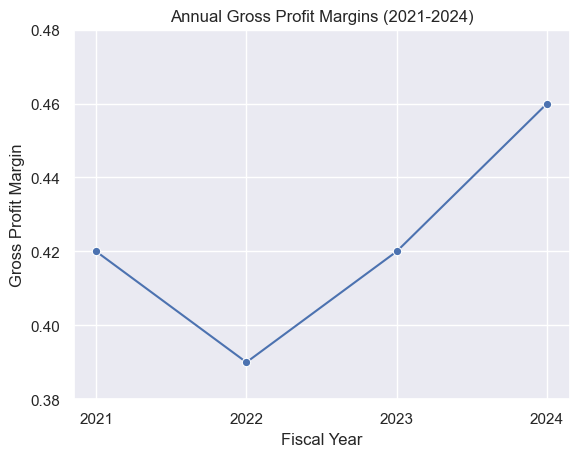

In [47]:
# Setting theme, figure size, and multiple plot spacing
sns.set_theme(style='darkgrid')

sns.lineplot(percentage_of_rev_is.iloc[36],  marker='o')
plt.title('Annual Gross Profit Margins (2021-2024)')
plt.xlabel('Fiscal Year')
plt.xticks(np.arange(4), [2021, 2022, 2023, 2024])
plt.ylabel('Gross Profit Margin')
plt.ylim([0.38, 0.48])

Observation:

- From 2022 to 2024, Netflix has slowly increased its gross profit margins from 39% in 2022 to 46% in 2024, showing a 7% increase over 2 years

- This reveals that Netflix is profiting 46% on every dollar made after expenses and is the largest company in the streaming sector by revenue

[Back to Table of Contents](#back)

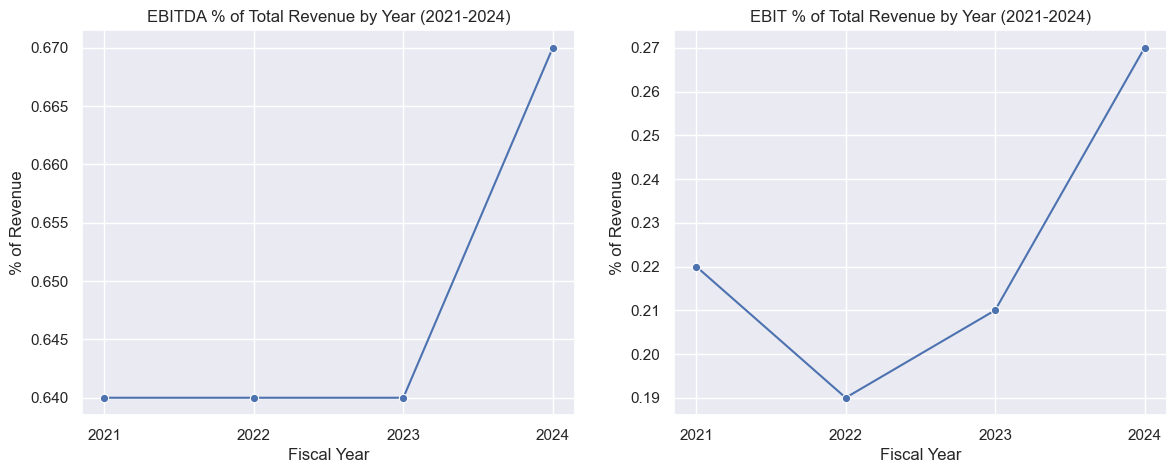

In [ ]:
# Setting theme, figure size, and multiple plot spacing
plt.figure(figsize=[14, 5])

plt.subplot(1, 2, 1)
sns.lineplot(percentage_of_rev_is.iloc[6],  marker='o')
plt.title('EBITDA % of Total Revenue by Year (2021-2024)')
plt.xlabel('Fiscal Year')
plt.xticks(np.arange(4), [2021, 2022, 2023, 2024])
plt.ylabel('% of Revenue')
plt.ylim([0.635, 0.68])

plt.subplot(1, 2, 2)
sns.lineplot(percentage_of_rev_is.iloc[7],  marker='o')
plt.title('EBIT % of Total Revenue by Year (2021-2024)')
plt.xlabel('Fiscal Year')
plt.xticks(np.arange(4), [2021, 2022, 2023, 2024])
plt.ylabel('% of Revenue')
#plt.ylim([0.635, 0.68])
plt.show()

Observation:

- EBITDA as a percentage of total operational revenue has been consistent from 2021-2023; however, in 2024, Netflix has seen its largest increase in EBITDA as a percentage of total operational revenue in at least 3 years

- The EBITDA data shows that Netflix has been leaner in 2024 than in prior years, meaning they are profiting more of their total operational revenue this year than in past years. Possibly due to a mixture of increasing year-over-year operational revenue and declining year-over-year expenses.

- EBIT, as a percentage of total operational revenue, has also increased from 2023 to 2024 and has been  growing since 2022

- The growth in EBITDA and EBIT indicates that Netflix has become more efficient with its operations and has strong operational profitability from its core business

[Back to Table of Contents](#back)

Observation:

- 

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)